# 1. Explore the Data 

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV files into dataframes
users_df = pd.read_csv(r'C:\Users\kathy\Downloads\USER_TAKEHOME.csv')
products_df = pd.read_csv(r'C:\Users\kathy\Downloads\PRODUCTS_TAKEHOME.csv')
transactions_df = pd.read_csv(r'C:\Users\kathy\Downloads\TRANSACTION_TAKEHOME.csv')

# Inspect the data
print("Users DataFrame Overview:")
users_df.head()

Users DataFrame Overview:


,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [108]:
print("\nProducts DataFrame Overview:")
products_df.head()


Products DataFrame Overview:


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [109]:
print("\nTransactions DataFrame Overview:")
transactions_df.head()


Transactions DataFrame Overview:


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


### a. Check Data Types

In [110]:
users_df.info()
products_df.info()
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
d

### Convert Data Types

In [111]:
# Convert date columns to datetime
users_df['CREATED_DATE'] = pd.to_datetime(users_df['CREATED_DATE'], errors='coerce')
users_df['BIRTH_DATE'] = pd.to_datetime(users_df['BIRTH_DATE'], errors='coerce')

transactions_df['PURCHASE_DATE'] = pd.to_datetime(transactions_df['PURCHASE_DATE'], errors='coerce')
transactions_df['SCAN_DATE'] = pd.to_datetime(transactions_df['SCAN_DATE'], errors='coerce')

# Convert ID fields to string (object) type
users_df['ID'] = users_df['ID'].astype(str)
transactions_df['USER_ID'] = transactions_df['USER_ID'].astype(str)
transactions_df['RECEIPT_ID'] = transactions_df['RECEIPT_ID'].astype(str)
products_df['BARCODE'] = products_df['BARCODE'].astype(str)
transactions_df['BARCODE'] = transactions_df['BARCODE'].astype(str)

# Convert categorical columns to 'category' datatype
users_df['STATE'] = users_df['STATE'].astype('category')
users_df['LANGUAGE'] = users_df['LANGUAGE'].astype('category')
users_df['GENDER'] = users_df['GENDER'].astype('category')

products_df['CATEGORY_1'] = products_df['CATEGORY_1'].astype('category')
products_df['CATEGORY_2'] = products_df['CATEGORY_2'].astype('category')
products_df['CATEGORY_3'] = products_df['CATEGORY_3'].astype('category')
products_df['CATEGORY_4'] = products_df['CATEGORY_4'].astype('category')
products_df['MANUFACTURER'] = products_df['MANUFACTURER'].astype('category')
products_df['BRAND'] = products_df['BRAND'].astype('category')

# Convert FINAL_QUANTITY and FINAL_SALE in transactions_df to numeric
transactions_df['FINAL_QUANTITY'] = pd.to_numeric(transactions_df['FINAL_QUANTITY'], errors='coerce')
transactions_df['FINAL_SALE'] = pd.to_numeric(transactions_df['FINAL_SALE'], errors='coerce')

# Checking the final datatypes after conversion
print(users_df.dtypes)
print(products_df.dtypes)
print(transactions_df.dtypes)


ID                           object
CREATED_DATE    datetime64[ns, UTC]
BIRTH_DATE      datetime64[ns, UTC]
STATE                      category
LANGUAGE                   category
GENDER                     category
dtype: object
CATEGORY_1      category
CATEGORY_2      category
CATEGORY_3      category
CATEGORY_4      category
MANUFACTURER    category
BRAND           category
BARCODE           object
dtype: object
RECEIPT_ID                     object
PURCHASE_DATE          datetime64[ns]
SCAN_DATE         datetime64[ns, UTC]
STORE_NAME                     object
USER_ID                        object
BARCODE                        object
FINAL_QUANTITY                float64
FINAL_SALE                    float64
dtype: object


### b. Check for Missing Value

###### Users Table: Major missing data is in the **LANGUAGE** and GENDER columns.

###### Products Table: **CATEGORY_4** has significant missing data, while CATEGORY_3, MANUFACTURER, and BRAND have some missing data.

###### Transactions Table: Fields are complete, but there are many missing values in both **FINAL_QUANTITY** and **FINAL_SALE**.

DEPRECATION: Loading egg at c:\users\kathy\anaconda3\lib\site-packages\huggingface_hub-0.24.0rc0-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


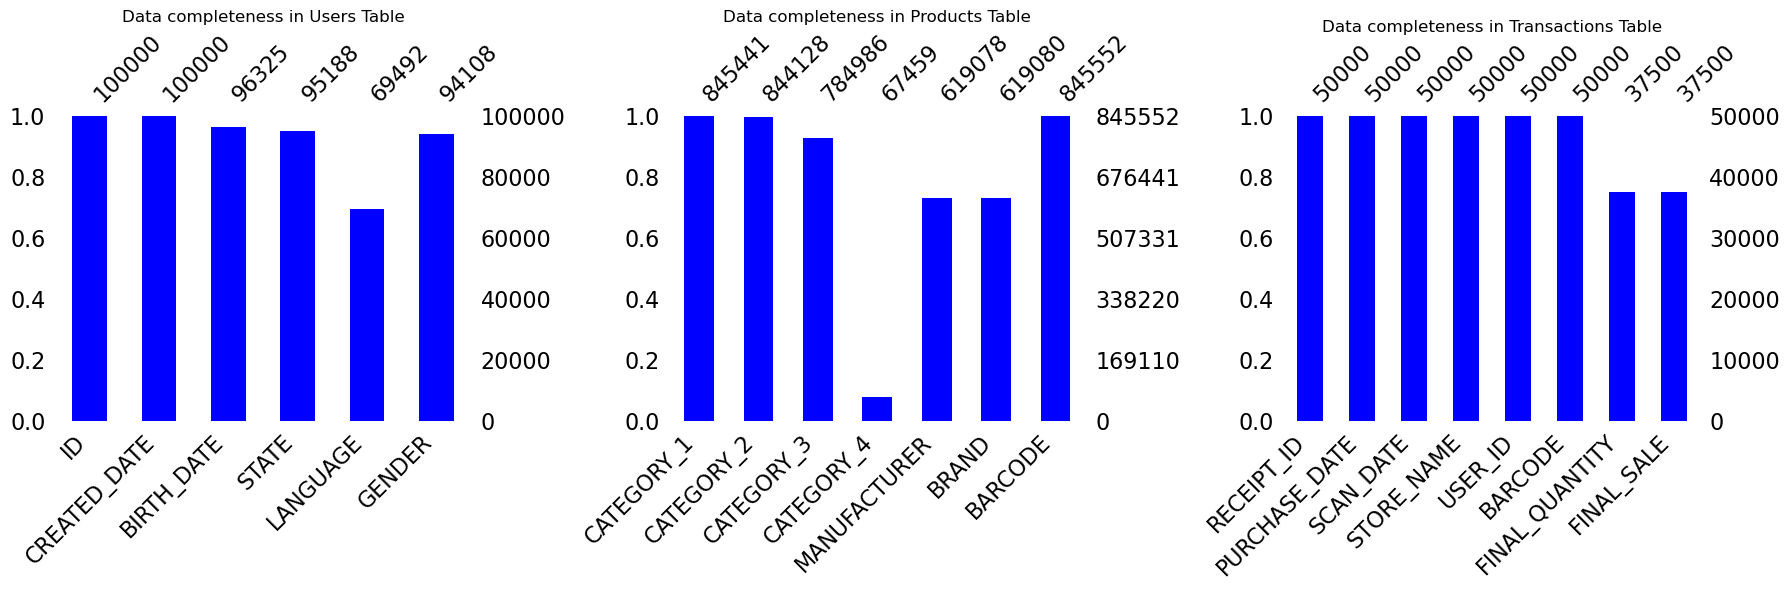

In [112]:
!pip install missingno
import missingno as msno
null_df = pd.DataFrame({
    "Users Null Values": users_df.isnull().sum(),
    "Users Percentage Null": (users_df.isnull().sum() / users_df.shape[0]) * 100,
    "Products Null Values": products_df.isnull().sum(),
    "Products Percentage Null": (products_df.isnull().sum() / products_df.shape[0]) * 100,
     "Transactions Null Values": transactions_df.isnull().sum(),
    "Transactions Percentage Null": (transactions_df.isnull().sum() / products_df.shape[0]) * 100
})

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the missing data bar chart for users_df
msno.bar(users_df, ax=axs[0], color="blue")
axs[0].set_title("Data completeness in Users Table")

# Plot the missing data bar chart for products_df
msno.bar(products_df, ax=axs[1], color="blue")
axs[1].set_title("Data completeness in Products Table")

# Plot the missing data bar chart for transactions_df
msno.bar(transactions_df, ax=axs[2], color="blue")
axs[2].set_title("Data completeness in Transactions Table")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [113]:
print("\nMissing Values in Users DataFrame:")
print(users_df.isnull().sum())
print("\nMissing Values in Products DataFrame:")
print(products_df.isnull().sum())
print("\nMissing Values in Transactions DataFrame:")
print(transactions_df.isnull().sum())


Missing Values in Users DataFrame:
ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

Missing Values in Products DataFrame:
CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE              0
dtype: int64

Missing Values in Transactions DataFrame:
RECEIPT_ID            0
PURCHASE_DATE         0
SCAN_DATE             0
STORE_NAME            0
USER_ID               0
BARCODE               0
FINAL_QUANTITY    12500
FINAL_SALE        12500
dtype: int64


### 3. Handle Data Quality Issues & Duplicate Entries 

#####  There are duplicate entries for the same RECEIPT_ID appears twice with the same PURCHASE_DATE, SCAN_DATE, and USER_ID, but only one of the duplicated rows has complete quantity and sale information. The other duplicated row contains missing values. This indicates data entry errors.

In [114]:
# Show duplicates based on specific columns 
df_sorted = transactions_df.sort_values(by=['RECEIPT_ID'])
duplicate_entries = df_sorted[df_sorted.duplicated(subset=['RECEIPT_ID', 'PURCHASE_DATE', 'STORE_NAME', 'USER_ID', 'BARCODE'], keep=False)]
duplicate_entries

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,15300014978.0,1.0,NaN
41567,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,15300014978.0,1.0,1.54
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,nan,NaN,1.49
39291,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,nan,1.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART,60842f207ac8b7729e472020,78742229751.0,1.0,NaN
...,...,...,...,...,...,...,...,...
28152,fffbb112-3cc5-47c2-b014-08db2f87e0c7,2024-07-30,2024-08-04 11:43:31.474000+00:00,WALMART,5eb59d6be7012d13941af5e2,818000020115.0,1.0,4.88
24998,fffbfb2a-7c1f-41c9-a5da-628fa7fcc746,2024-07-28,2024-07-28 11:47:34.180000+00:00,WALMART,62a0c8f7d966665570351bb8,13000009546.0,1.0,NaN
31602,fffbfb2a-7c1f-41c9-a5da-628fa7fcc746,2024-07-28,2024-07-28 11:47:34.180000+00:00,WALMART,62a0c8f7d966665570351bb8,13000009546.0,1.0,3.48
25233,fffe8012-7dcf-4d84-b6c6-feaacab5074a,2024-09-07,2024-09-08 08:21:25.648000+00:00,WALGREENS,5f53c62bd683c715b9991b20,74323095777.0,2.0,2.98


In [115]:
unique_rows = transactions_df.drop_duplicates(subset=['RECEIPT_ID', 'PURCHASE_DATE', 'STORE_NAME', 'USER_ID', 'BARCODE'])

num_unique_rows = unique_rows.shape[0]

print(f"Number of unique rows based on specific columns: {num_unique_rows}")


Number of unique rows based on specific columns: 24795


#### Clean duplicate rows in the transaction dataset by replacing invalid or non-numeric values, ensuring that only valid entries with non-zero quantities and sales are kept.

In [116]:
# Step 1: Identify rows with duplicates based on specific columns
duplicate_rows = transactions_df[transactions_df.duplicated(subset=['RECEIPT_ID', 'PURCHASE_DATE', 'SCAN_DATE', 'STORE_NAME', 'USER_ID', 'BARCODE'], keep=False)]

# Step 2: Replace 'zero' with NaN for easier handling of non-numeric data
duplicate_rows['FINAL_QUANTITY'].replace('zero', pd.NA, inplace=True)

# Step 3: Convert FINAL_QUANTITY and FINAL_SALE to numeric values, coercing errors
duplicate_rows['FINAL_QUANTITY'] = pd.to_numeric(duplicate_rows['FINAL_QUANTITY'], errors='coerce')
duplicate_rows['FINAL_SALE'] = pd.to_numeric(duplicate_rows['FINAL_SALE'], errors='coerce')

# Step 4: Keep only the rows where both FINAL_QUANTITY and FINAL_SALE are valid (not zero or NaN)
valid_rows = duplicate_rows.dropna(subset=['FINAL_QUANTITY', 'FINAL_SALE'])
valid_rows = valid_rows[(valid_rows['FINAL_QUANTITY'] > 0) & (valid_rows['FINAL_SALE'] > 0)]

# Step 5: Drop the duplicate entries from the original DataFrame and add the cleaned valid rows
transactions_df = pd.concat([transactions_df.drop(duplicate_rows.index), valid_rows])

# Display the cleaned data
transactions_df.head(10)


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
25000,7b3ec72d-9d30-40b8-b185-0bfb638942a9,2024-08-20,2024-08-20 11:17:29.633000+00:00,DOLLAR GENERAL STORE,60fc1e6deb7585430ff52ee7,745527114884.0,1.0,1.65
25001,04869b68-29e3-4e8d-9bdb-950046fc3473,2024-08-05,2024-08-09 16:06:00.570000+00:00,DOLLAR GENERAL STORE,654cf234a225ea102b81072e,745527114884.0,1.0,1.65
25002,f1a96308-24a5-46a8-8d8c-285cf9dce1ba,2024-09-03,2024-09-03 11:28:25.264000+00:00,WALMART,63c1cb6d3d310dceeac55487,37000828761.0,1.0,28.22
25003,7ee1798e-fd2e-4278-838b-f417fdcafe08,2024-08-30,2024-09-04 12:53:31.478000+00:00,DOLLAR GENERAL STORE,65c29b137050d0a6206cd24f,12000504051.0,1.0,5.25
25004,21feab39-49f2-42e9-ae69-10371e2fc0a9,2024-08-23,2024-08-27 10:45:00.125000+00:00,TARGET,61a58ac49c135b462ccddd1c,24000393429.0,1.0,2.59
25005,30977cbc-1d29-4f2d-851c-1104432769d0,2024-09-01,2024-09-01 09:40:16.103000+00:00,WALMART,5baf733455206419c416c3be,37000779704.0,1.0,2.20
25006,48c7720b-7097-4cee-995e-721e52c623bd,2024-06-25,2024-06-25 17:56:43.654000+00:00,COSTCO,65c5b9a416cc39173210ae15,9697867.0,1.0,9.69
25007,d542a912-30a7-4f73-89a8-365f8de17409,2024-08-12,2024-08-15 18:34:31.745000+00:00,FOOD LION,6567a084bc6a13d85a5cf0dd,752798149286.0,2.0,1.58
25008,c70b5591-92a5-4d9f-8d82-5525cf91cfaf,2024-06-20,2024-06-21 11:32:23.957000+00:00,WALMART,62f069014e73e2db30ecab93,17000132556.0,1.0,8.76
25009,21a0945c-09ec-4b76-92e4-f2e590062470,2024-07-29,2024-08-02 13:27:25.284000+00:00,MARKET BASKET,6318f67ab2906b770ead6e92,70200504318.0,1.0,3.49


In [144]:
num_columns = transactions_df.shape[0]

print(f'After removing duplicates, the number of rows for transactions table is: {num_columns}')

After removing duplicates, the number of rows for transactions table is: 24679


In [64]:
print("\nMissing Values in Transactions DataFrame:")
print(transactions_df.isnull().sum())


Missing Values in Transactions DataFrame:
RECEIPT_ID        0
PURCHASE_DATE     0
SCAN_DATE         0
STORE_NAME        0
USER_ID           0
BARCODE           0
FINAL_QUANTITY    0
FINAL_SALE        0
dtype: int64


### d. Check Distribution of FINAL_QUANTITY and FINAL_SALE

##### The average quantity purchased is 1.08, with most transactions involving around 1 unit of a product. The average sale amount is 4.63. The median sale is 3.12, indifacting that the majority of transactions are for relatively low-value items.

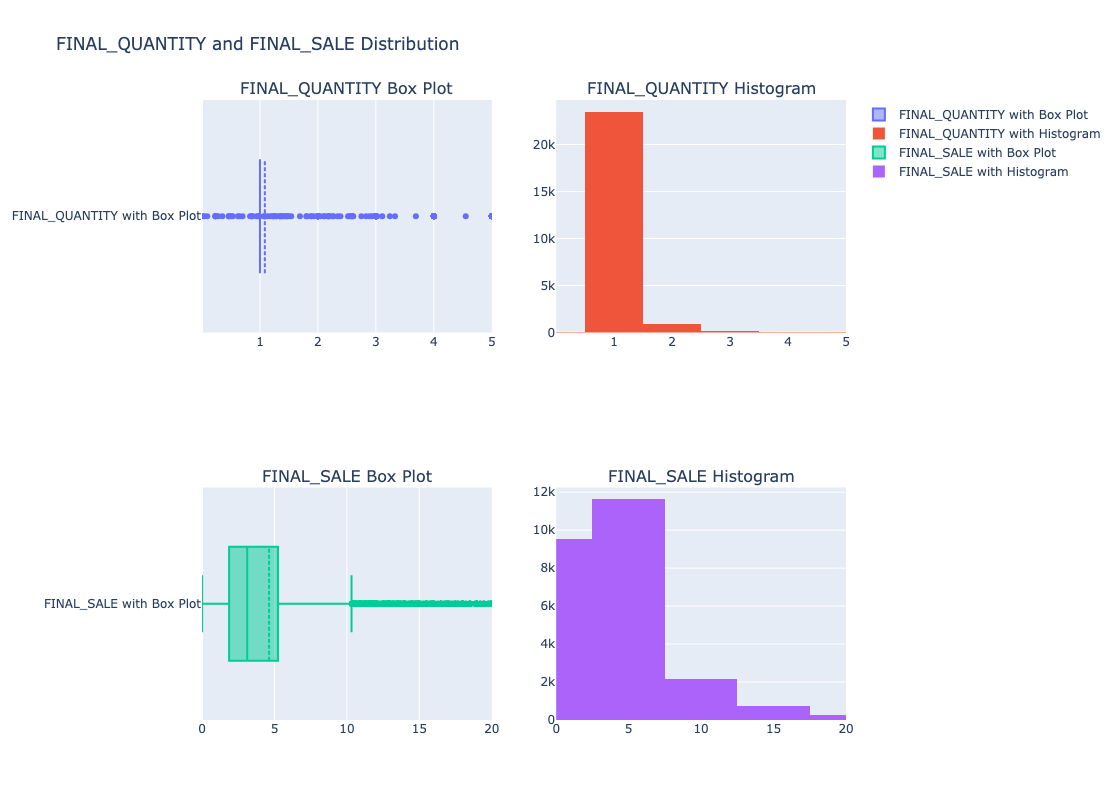

In [65]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: two rows, two columns
fig = make_subplots(
    rows=2, cols=2, 
    subplot_titles=("FINAL_QUANTITY Box Plot", "FINAL_QUANTITY Histogram", "FINAL_SALE Box Plot", "FINAL_SALE Histogram")
)

# Box plot for FINAL_QUANTITY (limit x-axis to a reasonable range, e.g., [0, 20])
trace1 = go.Box(x=transactions_df['FINAL_QUANTITY'], name='FINAL_QUANTITY with Box Plot', boxmean=True)
fig.add_trace(trace1, row=1, col=1)
fig.update_xaxes(range=[0, 5], tickvals=[1, 2, 3, 4, 5], row=1, col=1)  # Adjust range for FINAL_QUANTITY

# Histogram for FINAL_QUANTITY (limit x-axis range and set bin size to 1)
trace2 = go.Histogram(x=transactions_df['FINAL_QUANTITY'], name='FINAL_QUANTITY with Histogram', xbins=dict(size=1))
fig.add_trace(trace2, row=1, col=2)
fig.update_xaxes(range=[0, 5], tickvals=[1, 2, 3, 4, 5], row=1, col=2)  # Adjust range for FINAL_QUANTITY

# Box plot for FINAL_SALE (limit x-axis to a reasonable range, e.g., [0, 100])
trace3 = go.Box(x=transactions_df['FINAL_SALE'], name='FINAL_SALE with Box Plot', boxmean=True)
fig.add_trace(trace3, row=2, col=1)
fig.update_xaxes(range=[0, 20], row=2, col=1)  # Adjust range for FINAL_SALE

# Histogram for FINAL_SALE (limit x-axis range and set bin size to a reasonable value)
trace4 = go.Histogram(x=transactions_df['FINAL_SALE'], name='FINAL_SALE with Histogram', xbins=dict(size=5))
fig.add_trace(trace4, row=2, col=2)
fig.update_xaxes(range=[0, 20], row=2, col=2)  # Adjust range for FINAL_SALE

# Update layout for better readability
fig.update_layout(height=800, width=1000, title_text="FINAL_QUANTITY and FINAL_SALE Distribution")
fig.show()

In [66]:
transactions_df.describe()

,PURCHASE_DATE,FINAL_QUANTITY,FINAL_SALE
count,24679,24679.000000,24679.000000
mean,2024-07-24 09:39:59.465132288,1.084343,4.629107
min,2024-06-12 00:00:00,0.010000,0.010000
25%,2024-07-03 00:00:00,1.000000,1.870000
50%,2024-07-24 00:00:00,1.000000,3.120000
75%,2024-08-15 00:00:00,1.000000,5.250000
max,2024-09-08 00:00:00,276.000000,462.820000
std,NaN,1.806564,6.556336


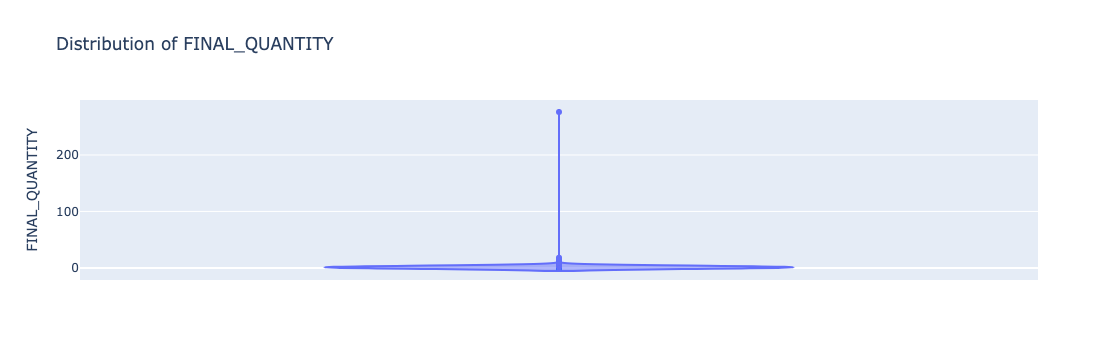

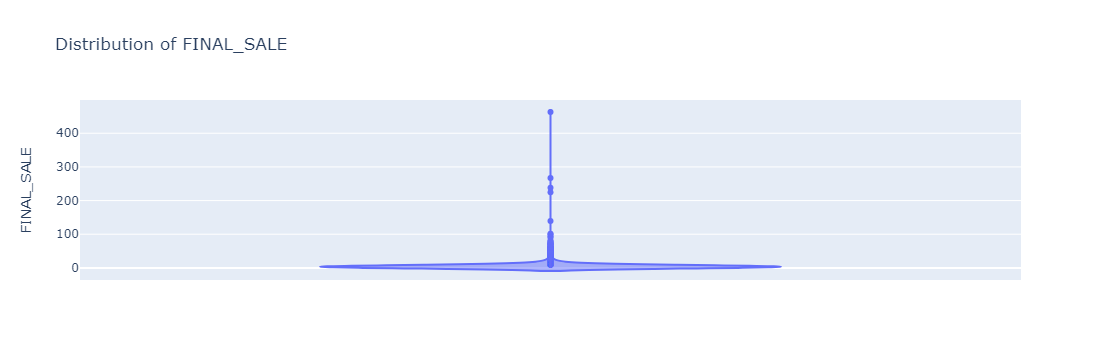

In [67]:
import plotly.express as px

# Convert FINAL_QUANTITY and FINAL_SALE to numeric if needed
transactions_df['FINAL_QUANTITY'] = pd.to_numeric(transactions_df['FINAL_QUANTITY'], errors='coerce')
transactions_df['FINAL_SALE'] = pd.to_numeric(transactions_df['FINAL_SALE'], errors='coerce')

# Create a violin plot for FINAL_QUANTITY distribution
fig_quantity = px.violin(transactions_df, y='FINAL_QUANTITY', title="Distribution of FINAL_QUANTITY")
fig_quantity.show()

# Create a violin plot for FINAL_SALE distribution
fig_sale = px.violin(transactions_df, y='FINAL_SALE', title="Distribution of FINAL_SALE")
fig_sale.show()

### e. Time Series Analysis 

##### From the chart, we can observe that **Snacks** and **Health & Wellness** categories have consistently higher sales compared to other categories, with notable sales peaks around June 30th and August 25th.

C:\Users\kathy\AppData\Local\Temp\ipykernel_23452\3672214416.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\kathy\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



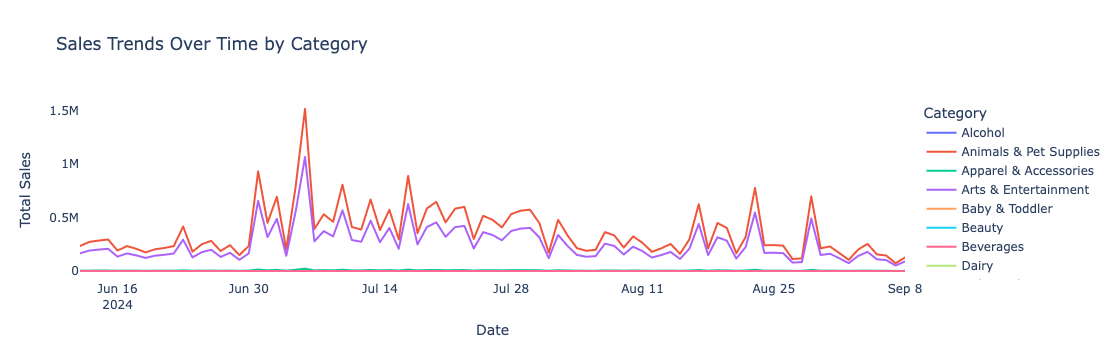

In [82]:
# Step 1: Merge Transactions and Products DataFrames on 'BARCODE'
merged_df = pd.merge(transactions_df, products_df, on='BARCODE', how='left')

# Convert 'PURCHASE_DATE' to datetime
merged_df['purchase_date'] = pd.to_datetime(merged_df['PURCHASE_DATE'])

# Step 3: Group by date and category_1, summing the sales
sales_over_time_by_category = merged_df.groupby([merged_df['purchase_date'].dt.date, 'CATEGORY_1'])['FINAL_SALE'].sum().reset_index()

# Step 4: Create a line chart using Plotly Express
fig = px.line(sales_over_time_by_category, 
              x='purchase_date', 
              y='FINAL_SALE', 
              color='CATEGORY_1',  # Different lines for each category
              title='Sales Trends Over Time by Category',
              labels={'purchase_date': 'Date', 'FINAL_SALE': 'Total Sales', 'CATEGORY_1': 'Category'})

# Customize the layout for better aesthetics
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Total Sales',
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    xaxis=dict(showgrid=True),  # Show x-axis gridlines
    yaxis=dict(showgrid=True)   # Show y-axis gridlines
)

# Step 5: Show the chart
fig.show()

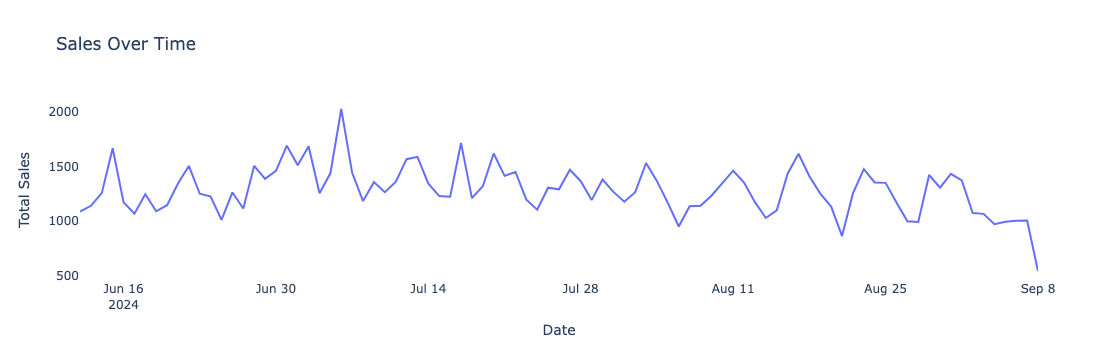

In [77]:
# Convert 'PURCHASE_DATE' to datetime if not already
transactions_df['purchase_date'] = pd.to_datetime(transactions_df['PURCHASE_DATE'])

# Group by date and calculate total sales
sales_over_time = transactions_df.groupby(transactions_df['purchase_date'].dt.date)['FINAL_SALE'].sum().reset_index()

# Create a line chart using Plotly Express
fig = px.line(sales_over_time, 
              x='purchase_date', 
              y='FINAL_SALE', 
              title='Sales Over Time',
              labels={'purchase_date': 'Date', 'FINAL_SALE': 'Total Sales'})

# Customize the layout for better aesthetics
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Total Sales',
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    xaxis=dict(showgrid=True),  # Show x-axis gridlines
    yaxis=dict(showgrid=True)   # Show y-axis gridlines
)

# Show the chart
fig.show()


# 2. Answer the questions

In [68]:
import sqlite3

#### Question 1: Top 5 Brands by Receipts Scanned Among Users 21 and Over

In [187]:
# Step 1: Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Step 2: Write each dataframe to the SQLite database
users_df.to_sql('users', conn, index=False)
products_df.to_sql('products', conn, index=False)
transactions_df.to_sql('transactions', conn, index=False)

# Step 3: Write the SQL query with JOINs to merge tables and calculate age
query = """
WITH Age_Calculation AS (
    SELECT 
        t.RECEIPT_ID,
        p.BRAND,
        CAST(strftime('%Y', t.SCAN_DATE) AS INTEGER) - CAST(strftime('%Y', u.BIRTH_DATE) AS INTEGER) AS AGE
    FROM transactions t
    JOIN users u ON t.USER_ID = u.ID
    JOIN products p ON t.BARCODE = p.BARCODE
)
SELECT 
    BRAND,
    COUNT(RECEIPT_ID) AS Receipt_Count
FROM Age_Calculation
WHERE AGE >= 21 and brand is not null
GROUP BY BRAND
ORDER BY Receipt_Count DESC
LIMIT 5;
"""

# Step 4: Execute the query and display the result
result_df = pd.read_sql_query(query, conn)
print(result_df)

# Step 5: Close the connection
conn.close()

                       BRAND  Receipt_Count
0                  COCA-COLA            314
1  ANNIE'S HOMEGROWN GROCERY            288
2                       DOVE            279
3                   BAREFOOT            276
4                      ORIBE            252


#### Question 2: Top 5 Brands by Sales Among Users with Accounts for at Least Six Months

##### The graph compares the top 5 brands by receipts scanned among users aged 21 and over, with **Coca-Cola** leading, and the top 5 brands by sales among users with accounts for at least six months, where **Coca-Cola** also dominates in total sales.

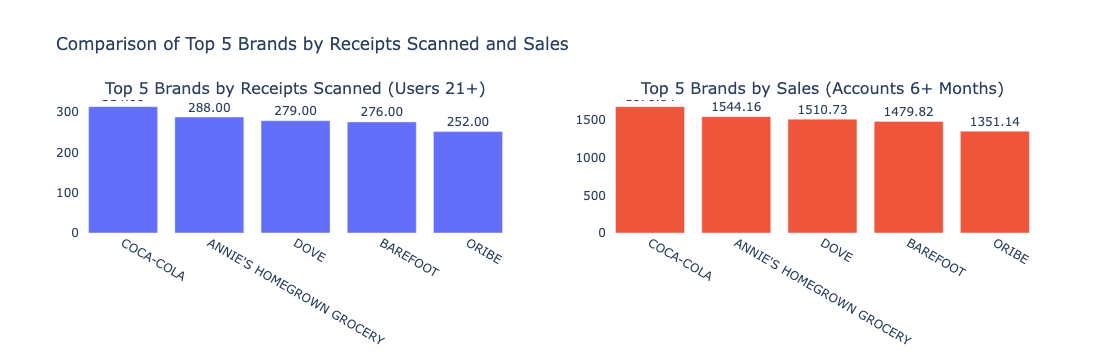

In [189]:
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Data for first chart (Top 5 brands by receipts scanned among users 21 and over)
data1 = {
    'BRAND': ["COCA-COLA", "ANNIE'S HOMEGROWN GROCERY", "DOVE", "BAREFOOT", "ORIBE"],
    'Total_Receipts': [314, 288, 279, 276, 252]
}

# Data for second chart (Top 5 brands by sales among users that have had their account for at least six months)
data2 = {
    'BRAND': ["COCA-COLA", "ANNIE'S HOMEGROWN GROCERY", "DOVE", "BAREFOOT", "ORIBE"],
    'Total_Sales': [1676.84, 1544.16, 1510.73, 1479.82, 1351.14]
}

# Create DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Create subplots: 1 row, 2 columns
fig = make_subplots(
    rows=1, cols=2,  # 1 row and 2 columns
    subplot_titles=("Top 5 Brands by Receipts Scanned (Users 21+)", "Top 5 Brands by Sales (Accounts 6+ Months)")
)

# Add first chart (Receipts Scanned)
fig.add_trace(
    go.Bar(x=df1['BRAND'], y=df1['Total_Receipts'], text=df1['Total_Receipts'], name="Total Receipts"),
    row=1, col=1
)

# Add second chart (Total Sales)
fig.add_trace(
    go.Bar(x=df2['BRAND'], y=df2['Total_Sales'], text=df2['Total_Sales'], name="Total Sales"),
    row=1, col=2
)

# Update traces (formatting text for both charts)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Update layout for better aesthetics
fig.update_layout(
    title_text="Comparison of Top 5 Brands by Receipts Scanned and Sales",
    showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    yaxis=dict(showgrid=False),  # Remove gridlines
)

# Show the combined plot
fig.show()


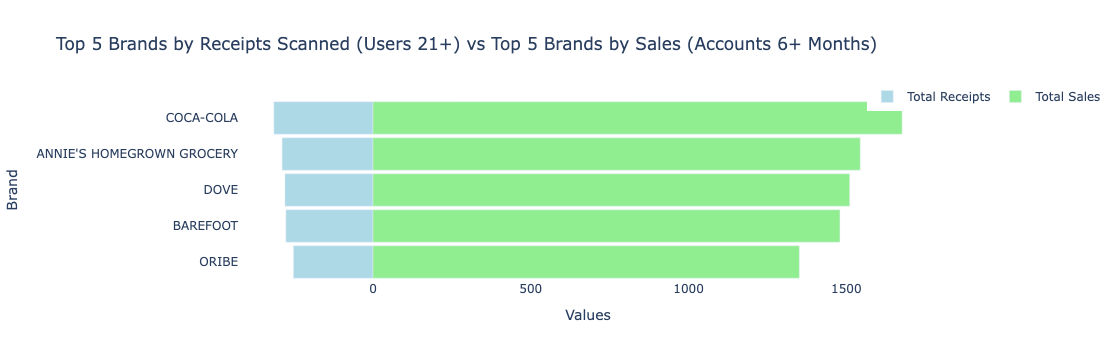

In [74]:
import plotly.graph_objects as go
import pandas as pd

# Data for the chart (Receipts Scanned and Total Sales by Brand)
data = {
    'BRAND': ["COCA-COLA", "ANNIE'S HOMEGROWN GROCERY", "DOVE", "BAREFOOT", "ORIBE"],
    'Total_Receipts': [314, 288, 279, 276, 252],
    'Total_Sales': [1676.84, 1544.16, 1510.73, 1479.82, 1351.14]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort the data by Total_Receipts and Total_Sales in descending order
df = df.sort_values(by=['Total_Receipts', 'Total_Sales'], ascending=True)

# Create the butterfly chart using mirrored bars
fig = go.Figure()

# Add the first bar for Total Receipts (negative to mirror)
fig.add_trace(go.Bar(
    y=df['BRAND'], 
    x=-df['Total_Receipts'],  # Negative values for mirroring
    name='Total Receipts',
    orientation='h',  # Horizontal bars
    marker=dict(color='lightblue')
))

# Add the second bar for Total Sales
fig.add_trace(go.Bar(
    y=df['BRAND'], 
    x=df['Total_Sales'],  # Positive values
    name='Total Sales',
    orientation='h',  # Horizontal bars
    marker=dict(color='lightgreen')
))

# Customize layout for a better appearance
fig.update_layout(
    title='Top 5 Brands by Receipts Scanned (Users 21+) vs Top 5 Brands by Sales (Accounts 6+ Months)',
    xaxis_title='Values',
    yaxis_title='Brand',
    barmode='overlay',  # Overlay the bars
    bargap=0.1,  # Small gap between bars
    xaxis=dict(showgrid=False),  # Remove gridlines
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    legend=dict(x=0.9, y=1.1, orientation='h')  # Horizontal legend
)

# Show the butterfly chart
fig.show()

In [184]:
# Step 1: Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Step 2: Write each dataframe to the SQLite database
users_df.to_sql('users', conn, index=False)
products_df.to_sql('products', conn, index=False)
transactions_df.to_sql('transactions', conn, index=False)

# Step 3: Write the SQL query to calculate account age and find top brands by sales
query = """
WITH Account_Age_Calculation AS (
    SELECT 
        t.RECEIPT_ID,
        p.BRAND,
        t.FINAL_SALE,
        (CAST(strftime('%Y', t.SCAN_DATE) AS INTEGER) - CAST(strftime('%Y', u.CREATED_DATE) AS INTEGER)) * 12 +
        (CAST(strftime('%m', t.SCAN_DATE) AS INTEGER) - CAST(strftime('%m', u.CREATED_DATE) AS INTEGER)) AS Account_Age_Months
    FROM transactions t
    JOIN users u ON t.USER_ID = u.ID
    JOIN products p ON t.BARCODE = p.BARCODE
)
SELECT 
    BRAND,
    SUM(FINAL_SALE) AS Total_Sales
FROM Account_Age_Calculation
WHERE Account_Age_Months >= 6 and Brand is not null
GROUP BY BRAND
ORDER BY Total_Sales DESC
LIMIT 5;
"""

# Step 4: Execute the query and display the result
result_df = pd.read_sql_query(query, conn)
print(result_df)

# Step 5: Close the connection
conn.close()

                       BRAND  Total_Sales
0                  COCA-COLA      1676.84
1  ANNIE'S HOMEGROWN GROCERY      1544.16
2                       DOVE      1510.73
3                   BAREFOOT      1479.82
4                      ORIBE      1351.14


#### Question 3: Percentage of Sales in the Health & Wellness Category by Generation

##### **Millennials (ages 25 to 40)** dominate Health & Wellness sales, driven by trends in fitness, self-care, and proactive health management, followed by Baby Boomers at 28%, Gen X at 19%, and a minimal contribution from the Silent Generation.

In [167]:
conn = sqlite3.connect(':memory:')

# Step 2: Write each dataframe to the SQLite database
users_df.to_sql('users', conn, index=False)
products_df.to_sql('products', conn, index=False)
transactions_df.to_sql('transactions', conn, index=False)

# Step 3: Write the SQL query to calculate percentage of Health & Wellness sales by generation
query = """
WITH Age_Calculation AS (
    SELECT 
        t.RECEIPT_ID,
        p.CATEGORY_1,
        t.FINAL_SALE,
        CAST(strftime('%Y', t.SCAN_DATE) AS INTEGER) - CAST(strftime('%Y', u.BIRTH_DATE) AS INTEGER) AS AGE
    FROM transactions t
    JOIN users u ON t.USER_ID = u.ID
    JOIN products p ON t.BARCODE = p.BARCODE
),
Generations AS (
    SELECT 
        CASE
            WHEN AGE BETWEEN 9 AND 24 THEN 'Gen Z'
            WHEN AGE BETWEEN 25 AND 40 THEN 'Millennials'
            WHEN AGE BETWEEN 41 AND 56 THEN 'Gen X'
            WHEN AGE BETWEEN 57 AND 75 THEN 'Baby Boomers'
            WHEN AGE > 75 THEN 'Silent Generation'
            ELSE 'Other'
        END AS Generation,
        FINAL_SALE,
        CATEGORY_1
    FROM Age_Calculation
),
Total_Health_Wellness_Sales AS (
    -- Calculate total sales in the Health & Wellness category across all generations
    SELECT 
        SUM(FINAL_SALE) AS Total_Health_Wellness_Sales
    FROM Generations
    WHERE CATEGORY_1 = 'Health & Wellness'
)
-- Final query to calculate the percentage of Health & Wellness sales by generation
SELECT 
    Generation,
    SUM(FINAL_SALE) * 100.0 / (SELECT Total_Health_Wellness_Sales FROM Total_Health_Wellness_Sales) AS Percentage_Health_Wellness_Sales
FROM Generations
WHERE CATEGORY_1 = 'Health & Wellness'
GROUP BY Generation
ORDER BY Percentage_Health_Wellness_Sales DESC;
"""

# Step 4: Execute the query and display the result
result_df = pd.read_sql_query(query, conn)
print(result_df)

# Step 5: Close the connection
conn.close()

          Generation  Percentage_Health_Wellness_Sales
0        Millennials                         53.468716
1       Baby Boomers                         27.897526
2              Gen X                         18.632432
3  Silent Generation                          0.001326


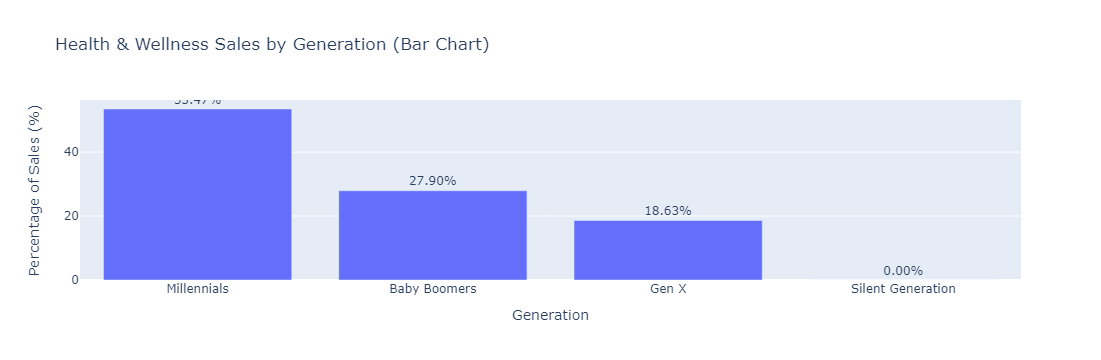

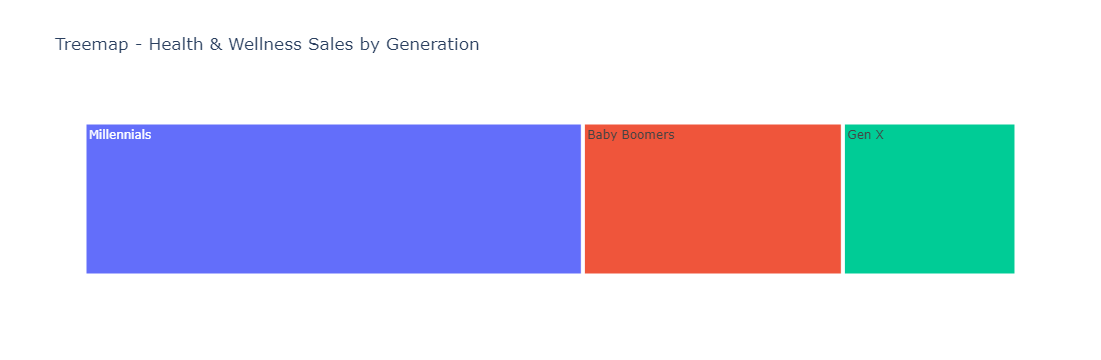

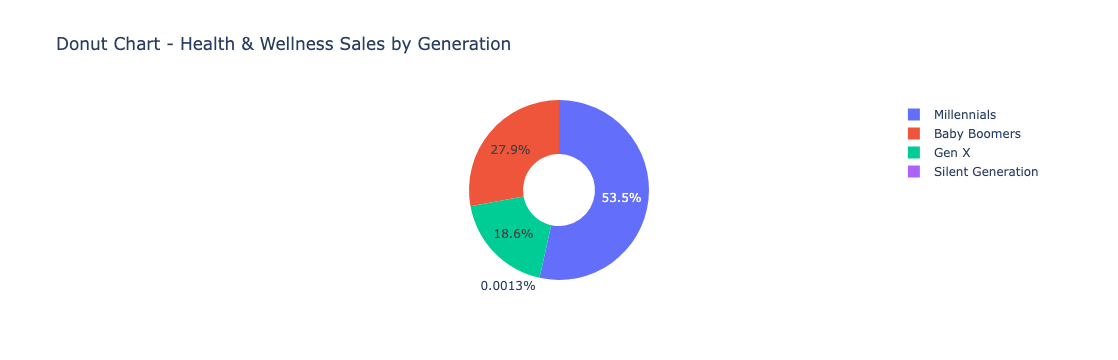

In [86]:
# Data for the generation health and wellness sales
result_df = pd.DataFrame({
    'Generation': ['Millennials', 'Baby Boomers', 'Gen X', 'Silent Generation'],
    'Percentage_Health_Wellness_Sales': [53.47, 27.90, 18.63, 0.0013]
})


# Create 100% stacked bar chart
result_df['Total'] = result_df['Percentage_Health_Wellness_Sales']  # A trick to use for 100% stacked
stacked_bar_chart = px.bar(result_df, x='Generation', y='Total',
                           title='100% Stacked Bar Chart - Health & Wellness Sales by Generation',
                           labels={'Total': 'Percentage of Sales (%)', 'Generation': 'Generation'},
                           text='Total')

# Create treemap chart
treemap_chart = px.treemap(result_df, path=['Generation'], values='Percentage_Health_Wellness_Sales',
                           title='Treemap - Health & Wellness Sales by Generation')

# Create donut chart (pie chart with a hole)
donut_chart = px.pie(result_df, names='Generation', values='Percentage_Health_Wellness_Sales', hole=0.4,
                     title='Donut Chart - Health & Wellness Sales by Generation')


# Display all charts
bar_chart.show()
treemap_chart.show()
donut_chart.show()

#### Question 4: Who are Fetch’s Power Users?
##### We want to focus on frequent customers who have been active within the past 3 months and have significant transaction values, as these users represent our most engaged and valuable customer base. 

In [146]:
# Step 1: Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Step 2: Write each dataframe to the SQLite database
users_df.to_sql('users', conn, index=False)
products_df.to_sql('products', conn, index=False)
transactions_df.to_sql('transactions', conn, index=False)

# Step 3: Write the SQL query to find customers in the past year, using all three tables
query = """
WITH Merged_Data AS (
    SELECT 
        t.USER_ID,
        t.SCAN_DATE,
        t.FINAL_SALE,
        t.RECEIPT_ID,
        u.ID AS User_ID,  
        p.BRAND           
    FROM transactions t
    LEFT JOIN users u ON t.USER_ID = u.ID
    LEFT JOIN products p ON t.BARCODE = p.BARCODE
    WHERE t.SCAN_DATE >= date('now', '-1 year')  
)
SELECT 
    USER_ID,
    COUNT(RECEIPT_ID) AS Total_Receipts,
    SUM(FINAL_SALE) AS Total_Sales
FROM Merged_Data
GROUP BY USER_ID
ORDER BY Total_Receipts DESC, Total_Sales DESC
LIMIT 10;
"""

# Step 4: Execute the query and load the result into a pandas DataFrame
result_df = pd.read_sql_query(query, conn)

# Step 5: Display the result
print('Top 10 Power User in the past 3 months')
print(result_df)

# Step 6: Close the connection
conn.close()

Top 10 Power User in the past 3 months
                    USER_ID  Total_Receipts  Total_Sales
0  64e62de5ca929250373e6cf5           40251    105742.73
1  604278958fe03212b47e657b           36226     64853.22
2  64023fa080552327896edb23           20126     56150.97
3  66390784b7b24d45d93a0e6a           20126     33130.54
4  63ae0dc29f3fc9c7546ef080           16102     55444.23
5  5d8661a736d69e65e99233af           16101     34139.59
6  61aea787e9b3d75037b5ea45           12078     25490.99
7  6456eac19f7c516a13f471f4           12077     57846.21
8  634aee03305e373439460ac3           12077     45205.05
9  63d97d69b425eb11a4709d56           12077     45170.28


#### Percentage of users without transactions from 2024-06-12 to 2024-09-08

##### Only 0.091% users have transactions in the past 3 months

In [137]:
# Step 1: Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Step 2: Write each dataframe to the SQLite database
users_df.to_sql('users', conn, index=False)
transactions_df.to_sql('transactions', conn, index=False)

# Step 3: Write the SQL query to find customers in the past year, using all three tables
query = """
WITH users_without_transactions AS (
    SELECT u.ID
    FROM Users u
    LEFT JOIN Transactions t
    ON u.ID = t.USER_ID
    WHERE t.USER_ID IS NULL
),
total_users AS (
    SELECT COUNT(*) AS total_user_count
    FROM Users
),
users_no_transaction_count AS (
    SELECT COUNT(*) AS no_transaction_count
    FROM users_without_transactions
)
SELECT 
    (u.no_transaction_count * 100.0 / t.total_user_count) AS percentage_no_transaction
FROM 
    users_no_transaction_count u,
    total_users t;
"""

# Step 4: Execute the query and load the result into a pandas DataFrame
result_df = pd.read_sql_query(query, conn)

# Step 5: Display the result
print(result_df)

# Step 6: Close the connection
conn.close()

   percentage_no_transaction
0                     99.909


# 3. Communicate with stakeholders

Email:

Dear XX,

I’d like to share a summary of the key findings from the user and transaction data between June 12, 2024, and September 8, 2024. Below are the main insights, data quality concerns, and some requests for clarification and next steps.

First, I noticed several data quality issues that need to be addressed:

1. Duplicate Entries: There are multiple instances of duplicate entries in the transaction table for the same receipt IDs. I retained only the entries with valid quantity and sale information for each transaction.
2. Missing Values: Several fields, including product categories, have missing or zero values.
3. Extreme values: There are very small quantities and sales values (e.g., 0.01) that may be outliers. Could these reflect products sold by weight, or are they potential data entry issues? Similarly, should extreme values like 276 for quantity and 462.82 for sale be addressed as outliers, or are they valid and expected?

Then, here are some key trends identified along with recommendations to help drive future strategy:

1. Millennials (age 25-40) account for the highest total sales across categories, particularly in health & wellness and beverage categories. This suggests that this age group is a dominant force in our revenue generation. Therefore, we could focus health and wellness campaigns on Millennials, with targeted messaging and promotions that resonate with their interest in fitness, self-care, and health management.
2. The top brands by receipts scanned among users aged 21+ and by sales for accounts active for at least six months include prominent names like COCA-COLA, ANNIE'S HOMEGROWN GROCERY, and DOVE. I would recommend leverage these top-performing brands in partnership or loyalty campaigns to increase Fetch's engagement. Offering exclusive promotions for these brands can help further drive sales and user interaction.
3. A small subset of users is responsible for the majority of receipts and sales, with only 0.1% of users making transactions in the past three months. I recommend creating personalized reward programs targeted at these high-value users (power users). Consider offering them premium membership or higher reward points to retain them and incentivize even greater usage.

Lastly, to move forward, I would like to confirm the following:

1. Could we work with the data team to validate the cause of the data entry errors and discuss solutions to fix them?
2. It would be helpful to get clarification on the missing product categories and brands for certain transactions. Are there alternative sources where we could pull this information?
3. To improve our customer segmentation, it would be helpful to have additional behavioral data and demographic data (e.g., income level, family size). This would allow us to conduct more refined customer segmentation and better tailor our marketing strategies.

Please let me know how we can proceed on these points. I look forward to discussing these insights further.

Thank you,
Jiatong Song